Open Dataset

In [2]:
import pandas as pd

threatList = pd.read_csv('Dataset\\finalThreat-Dataset.csv')

In [3]:
threatList.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443.0,192.168.10.5,54865.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80.0,192.168.10.5,55054.0,6.0,7/7/2017 3:30,109.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80.0,192.168.10.5,55055.0,6.0,7/7/2017 3:30,52.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443.0,192.168.10.16,46236.0,6.0,7/7/2017 3:30,34.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443.0,192.168.10.5,54863.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [4]:
threatList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128487 entries, 0 to 1128486
Data columns (total 85 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Flow ID                       1128487 non-null  object 
 1    Source IP                    1128487 non-null  object 
 2    Source Port                  1128487 non-null  float64
 3    Destination IP               1128487 non-null  object 
 4    Destination Port             1128487 non-null  float64
 5    Protocol                     1128487 non-null  float64
 6    Timestamp                    1128487 non-null  object 
 7    Flow Duration                1128487 non-null  float64
 8    Total Fwd Packets            1128487 non-null  float64
 9    Total Backward Packets       1128487 non-null  float64
 10  Total Length of Fwd Packets   1128487 non-null  float64
 11   Total Length of Bwd Packets  1128487 non-null  float64
 12   Fwd Packet Length Max      

Delete some Untrainable column

In [5]:
dropable_column = [
    'Flow ID',
    ' Source IP',
    ' Source Port',
    ' Destination IP',
    ' Timestamp'
]

threatList = threatList.drop(dropable_column, axis=1)
threatList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128487 entries, 0 to 1128486
Data columns (total 80 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Destination Port             1128487 non-null  float64
 1    Protocol                     1128487 non-null  float64
 2    Flow Duration                1128487 non-null  float64
 3    Total Fwd Packets            1128487 non-null  float64
 4    Total Backward Packets       1128487 non-null  float64
 5   Total Length of Fwd Packets   1128487 non-null  float64
 6    Total Length of Bwd Packets  1128487 non-null  float64
 7    Fwd Packet Length Max        1128487 non-null  float64
 8    Fwd Packet Length Min        1128487 non-null  float64
 9    Fwd Packet Length Mean       1128487 non-null  float64
 10   Fwd Packet Length Std        1128487 non-null  float64
 11  Bwd Packet Length Max         1128487 non-null  float64
 12   Bwd Packet Length Min      

Check for missing value

In [6]:
import numpy as np

NaN = False
for col in threatList.columns:
    count_NaN = threatList[col].isnull().sum()
    if count_NaN > 0:
        NaN = True
        print(f"Column '{col}' has {count_NaN} NaN values.")
        


Column 'Flow Bytes/s' has 240 NaN values.


In [7]:
threatList['Flow Bytes/s'].head()

0    4.000000e+06
1    1.100917e+05
2    2.307692e+05
3    3.529412e+05
4    4.000000e+06
Name: Flow Bytes/s, dtype: float64

In [8]:
threatList = threatList.dropna()
print('NaN value : ', threatList.isnull().sum().sum())

NaN value :  0


Check for negative value

In [9]:
column = threatList.select_dtypes(include=np.number).columns

min_column = [col for col in column if(threatList[col] < 0).any()]

if len(min_column) > 0:
    for col in min_column:
        min_sum = (threatList[col] < 0).sum()
        print(f'Negative value in column {col} : {min_sum}')


Negative value in column  Flow Duration : 66
Negative value in column Flow Bytes/s : 48
Negative value in column  Flow Packets/s : 66
Negative value in column  Flow IAT Mean : 66
Negative value in column  Flow IAT Max : 66
Negative value in column  Flow IAT Min : 1051
Negative value in column  Fwd IAT Min : 6
Negative value in column  Fwd Header Length : 11
Negative value in column  Bwd Header Length : 5
Negative value in column  Fwd Header Length.1 : 11
Negative value in column Init_Win_bytes_forward : 375174
Negative value in column  Init_Win_bytes_backward : 524085
Negative value in column  min_seg_size_forward : 11


In [10]:
winBytes = ['Init_Win_bytes_forward', ' Init_Win_bytes_backward']
for col in winBytes:
    threatList.loc[threatList[col] < 0, col] = -1
    print(f"Negative values in column '{col}' have been replaced with -1.")

Negative values in column 'Init_Win_bytes_forward' have been replaced with -1.
Negative values in column ' Init_Win_bytes_backward' have been replaced with -1.


In [11]:
num_columns = threatList.select_dtypes(include=np.number).columns
cols_to_rowDrop = []
for col in num_columns:
    if col not in winBytes:
        negative_count = (threatList[col] < 0).sum()
        if negative_count > 0:
            cols_to_rowDrop.append(col)

if len (cols_to_rowDrop) > 0:
    for col in cols_to_rowDrop:
        threatList = threatList[threatList[col] >= 0]

In [12]:
column = threatList.select_dtypes(include=np.number).columns

min_column = [col for col in column if(threatList[col] < 0).any()]

if len(min_column) > 0:
    for col in min_column:
        min_sum = (threatList[col] < 0).sum()
        print(f'Negative value in column {col} : {min_sum}')

else:
    print('No negative value found in any column.')

Negative value in column Init_Win_bytes_forward : 375158
Negative value in column  Init_Win_bytes_backward : 524069


Check for invinite value

In [13]:
cols = threatList.select_dtypes(include=[np.number]).columns
inf_columns = [col for col in cols if np.isinf(threatList[col]).any()]

if len(inf_columns) > 0:
    for col in inf_columns:
        inf_count = np.isinf(threatList[col]).sum()
        print(f"Column '{col}' has {inf_count} infinite values.")

Column 'Flow Bytes/s' has 564 infinite values.
Column ' Flow Packets/s' has 564 infinite values.


In [14]:
threatList.replace([np.inf, -np.inf], np.nan, inplace=True)
threatList = threatList.dropna()

if len(inf_columns) > 0:
    for col in inf_columns:
        inf_count = np.isinf(threatList[col]).sum()
        print(f"Column '{col}' has {inf_count} infinite values.")

Column 'Flow Bytes/s' has 0 infinite values.
Column ' Flow Packets/s' has 0 infinite values.


Split Dataset

In [15]:
from sklearn.model_selection import train_test_split

target = [' Label']
x = threatList.drop(columns=target)
y = threatList[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((901296, 79), (901296, 1), (225325, 79), (225325, 1))

Check data distribution

In [19]:
y_train[' Label'].value_counts()

 Label
BENIGN                        659043
PortScan                      126944
DDoS                          102511
bruteForce-FTP                  6329
bruteForce-SSH                  4697
Web Attack - Brute Force        1216
Web Attack - XSS                 541
Web Attack - Sql Injection        15
Name: count, dtype: int64

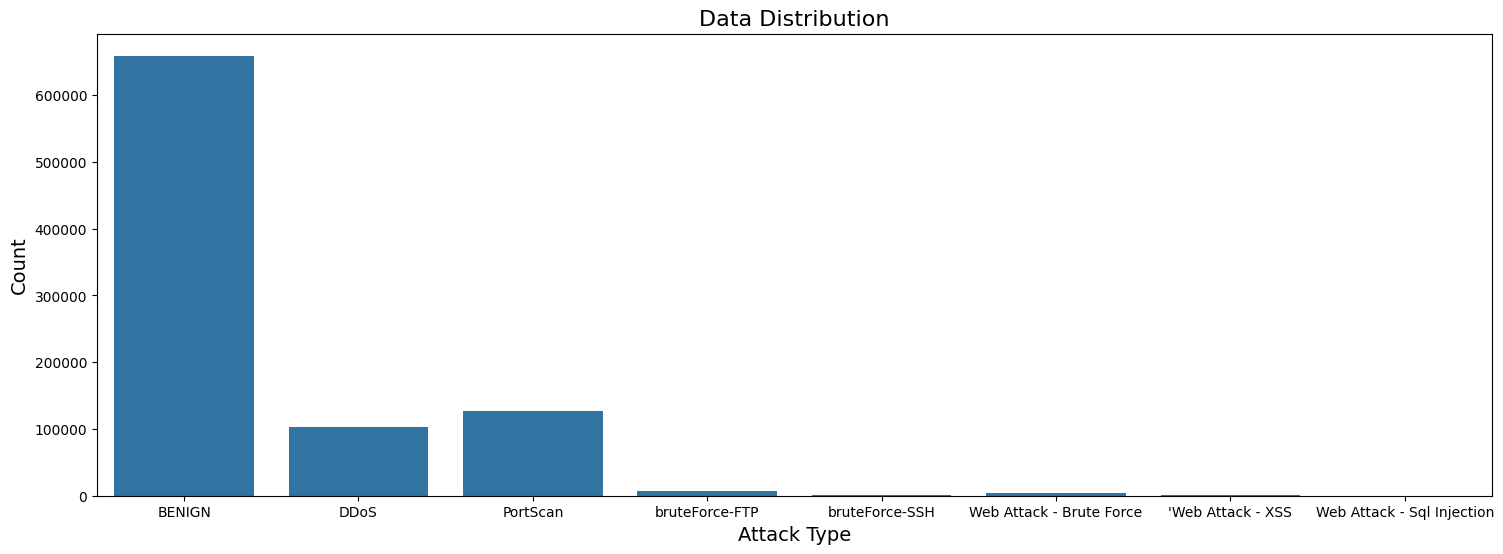

 Label                    
BENIGN                        659043
PortScan                      126944
DDoS                          102511
bruteForce-FTP                  6329
bruteForce-SSH                  4697
Web Attack - Brute Force        1216
Web Attack - XSS                 541
Web Attack - Sql Injection        15
Name: count, dtype: int64

In [26]:
from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(figsize=(18, 6))
sb.countplot(data=y_train, x=" Label")
plt.title("Data Distribution", fontsize=16)
plt.xlabel("Attack Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], labels=["BENIGN", "DDoS", "PortScan", "bruteForce-FTP", "bruteForce-SSH", "Web Attack - Brute Force", "'Web Attack - XSS", "Web Attack - Sql Injection"])
plt.show()

y_train.value_counts()